In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob
import torch 

In [18]:
path = 'sample/'
files = [path + file for file in os.listdir(path)]
print(files)


['sample/0001_wall.png', 'sample/0001_door.png', 'sample/0001_corner.png', 'sample/0001_window.png', 'sample/0001_entrance.png', 'sample/0001_shape.png', 'sample/0001_room.png']


In [19]:
def load_im(file):
    image_bgr = cv2.imread(file)
    h, w, c = image_bgr.shape
    image_bgra = np.concatenate([image_bgr, np.full((h, w, 1), 255, dtype=np.uint8)], axis=-1)
    white = np.all(image_bgr == [255, 255, 255], axis=-1)
    image_bgra[white, -1] = 0
    return image_bgra

In [20]:
images = dict()
for file in files:
    name = file.split('_')[1].split('.')[0]
    #im = load_im(file)
    im = cv2.imread(file)
    print(name,im.shape)
    #plt.imshow(im)
    #plt.show()
    images[name] = im


wall (512, 512, 3)
door (512, 512, 3)
corner (512, 512, 3)
window (512, 512, 3)
entrance (512, 512, 3)
shape (512, 512, 3)
room (512, 512, 3)


255


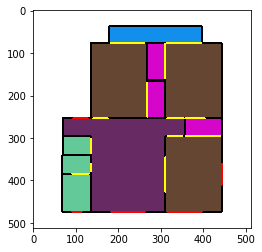

In [21]:
door = images['door']
door[:,:,2] = 255
window = images['window']
window[:,:,1] = 255
window[:,:,2] = 255
processed = cv2.bitwise_not(door+window-images['wall']-255,np.zeros((512,512,3)))
processed = cv2.bitwise_and(images['room'],processed)


print(processed.max())
plt.imshow(processed)
plt.show()

In [22]:
import cv2
import numpy as np
import os

def process(path):
    ### load image 
    files = [path +'/' + file for file in os.listdir(path)]
    images = dict()
    for file in files:
        name = file.split('_')[1].split('.')[0]
        im = cv2.imread(file)
        images[name] = im
    door = images['door']
    door[:,:,2] = 255
    window = images['window']
    window[:,:,1] = 255
    window[:,:,2] = 255
    processed = cv2.bitwise_not(door+window-images['wall']-255,np.zeros((512,512,3)))
    processed = cv2.bitwise_and(images['room'],processed)
    shape = images['shape']
    processed = cv2.resize(processed,(128,128),interpolation = cv2.INTER_LINEAR)
    shape = cv2.resize(shape,(128,128),interpolation = cv2.INTER_LINEAR)
    #plt.imshow(processed)
    #plt.show()
    #plt.imshow(shape)
    #plt.show()
    return processed, shape
    
#process('sample/')


In [23]:
input_dir = '/Users/alex/Desktop/RTS/building-design-assistant/datasets/energy/png'
file_paths = glob.glob(input_dir + '/*/*/*')
#taking as input the outputs of other transformer

In [24]:
print(len(file_paths))
print(file_paths[0])

72042
/Users/alex/Desktop/RTS/building-design-assistant/datasets/energy/png/0c/61/6407788e3dc8ab96802754f29454


In [25]:
energy = pd.read_csv('/Users/alex/Desktop/RTS/Pix2Pix_plans/energy_from_txt/all.csv', delimiter = ";")
print(energy)

        Unnamed: 0                               paths  max_number  \
0                0  0c/61/6407788e3dc8ab96802754f29454         454   
1                1  0c/61/9a70ffd39eb8b5ddea8251ae64d2         616   
2                2  0c/61/82be7dacf24447ad01ef9ef20ee4        1869   
3                3  0c/61/c3df18a509d7d4c440f9530b81d3         437   
4                4  0c/61/5eb69b10672997d4131d2f5ab622        1092   
...            ...                                 ...         ...   
100997      101041  0a/06/5a342c44a5483c5f7e5989478212         329   
100998      101042  0a/06/4e5a5332e0a19729ae0034d3420d         785   
100999      101043  0a/06/dd32b00e8d51f43123f64ea81a98        1885   
101000      101044  0a/06/001fc1fcde5accb860e2d59389f9         476   
101001      101045  0a/06/3dc3c277b926eeb841dc3b5c9510         417   

        Cooling_Load  Heating_Load   area   Cooling_norm    Heating_norm   
0            1558596       1081916  18000              87              60  
1      

In [26]:
pd_paths = list(energy['paths'])
pd_h = list(energy[' Heating_norm '])
pd_c = list(energy[' Cooling_norm '])
coolings = dict(zip(pd_paths,pd_c))
heatings = dict(zip(pd_paths,pd_h))

In [27]:
#/Users/alex/Desktop/RTS/building-design-assistant/datasets/energy/png
#for idx, path in enumerate(file_paths):  
 # files = [path +'/' + file for file in os.listdir(path)]
 # for file in files:
  #  os.remove(file)

In [28]:
data_c = []
data_h = []
output_dir = 'data_final/'
#/Users/alex/Desktop/RTS/building-design-assistant/datasets/energy/png
for idx, path in enumerate(file_paths): 
  if idx == 40000:
    break
  try : 
      name = '/'.join(path.split('/')[9:])
      h,c = coolings[name], heatings[name]
      data_c.append(c)
      data_h.append(h)
      processed, shape=process(path)
      cv2.imwrite(output_dir+'data/lines/lines/'+str(idx)+'.png', processed)
      cv2.imwrite(output_dir+'data/shapes/shapes/'+str(idx)+'.png', shape)
  except KeyError:
      pass
torch.save(torch.Tensor(data_c),output_dir + 'data_c.pt')
torch.save(torch.Tensor(data_h),output_dir + 'data_h.pt')

In [29]:
torch.load(output_dir + 'data_c.pt')

tensor([60.,  7.,  8.,  ..., 25.,  8.,  7.])

In [30]:
torch.load(output_dir + 'data_h.pt')

tensor([87.,  9., 10.,  ..., 35., 10.,  8.])